# Visualization

파이썬으로 그래프를 그린다는 것은 -> 도화지를 펼치고 축을 그리고 그 안에 데이터를 그리는 작업

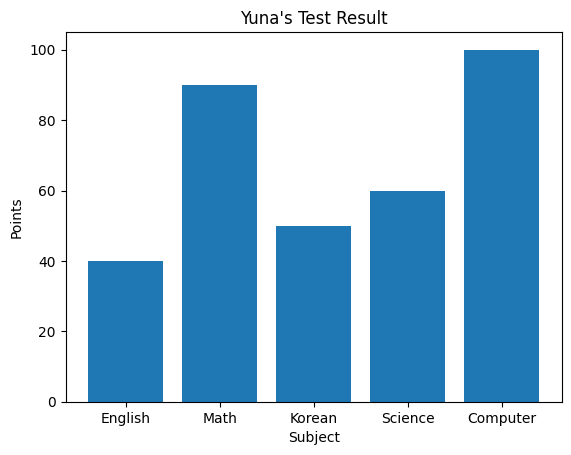

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 그래프 데이터
subject = ["English", "Math", "Korean", "Science", "Computer"]
points = [40, 90, 50, 60, 100]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel("Subject")
plt.ylabel("Points")
plt.title("Yuna's Test Result")

# 보여주기
plt.savefig("./barplot.png")
plt.show()

- %matplotlib inline 은 Rich output에 대한 표현 방식이다.
- 그래프와 같은 그림, 소리, 애니메이션과 같은 결과물을 Rich output 이라고 한다.
- 매직 명령어 참고 [https://studymake.tistory.com/601]

### 축 그리기
그래프를 그리는 순서는 하나의 그림(figure)객체를 만들고 그 안에 하위 그래프(subplot)를 추가한다.  
도화지에 축을 그리는 과정이다.

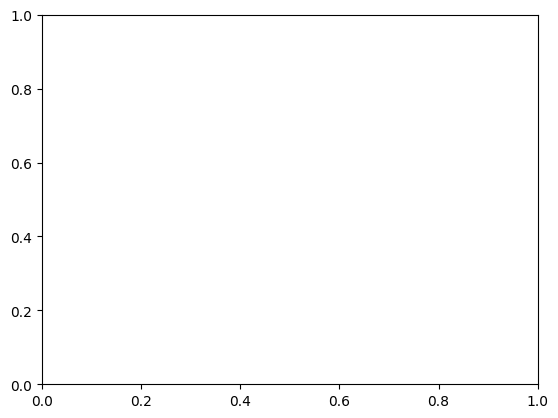

In [3]:
# 축 그리기
fig = plt.figure() # 도화지
ax1 = fig.add_subplot(1, 1, 1) # figure 객체에 add_subplot 메서드를 이용해 축을 그린다.

In [4]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

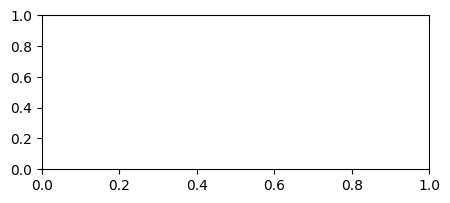

In [5]:
fig = plt.figure(figsize=(5,2))
ax1 = fig.add_subplot(1,1,1)

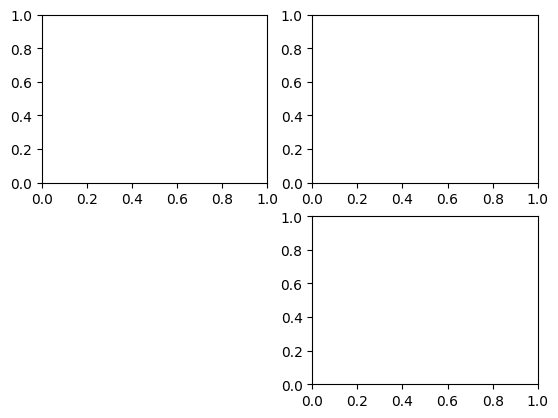

In [6]:
# 여러개 그래프 추가
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,4)

### 그래프 그리기

<BarContainer object of 5 artists>

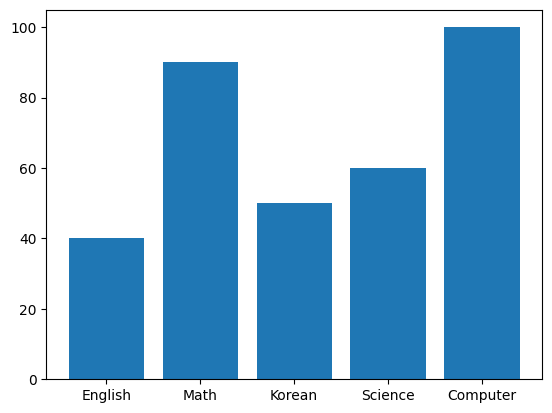

In [7]:
# bar 그래프

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.bar(x=subject, height=points)

### 그래프 요소 추가

Text(0.5, 1.0, 'title')

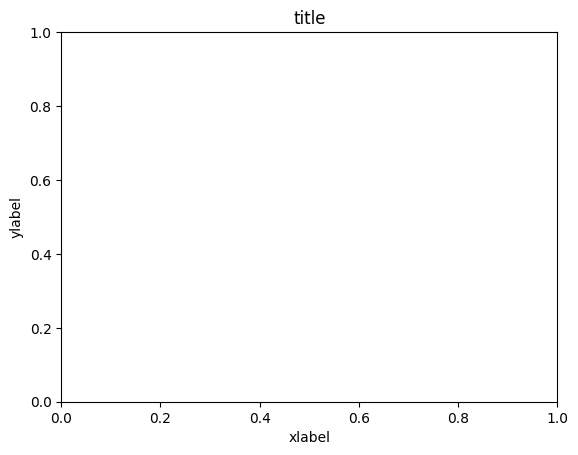

In [8]:
# label, title
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("title")

### 선 그래프

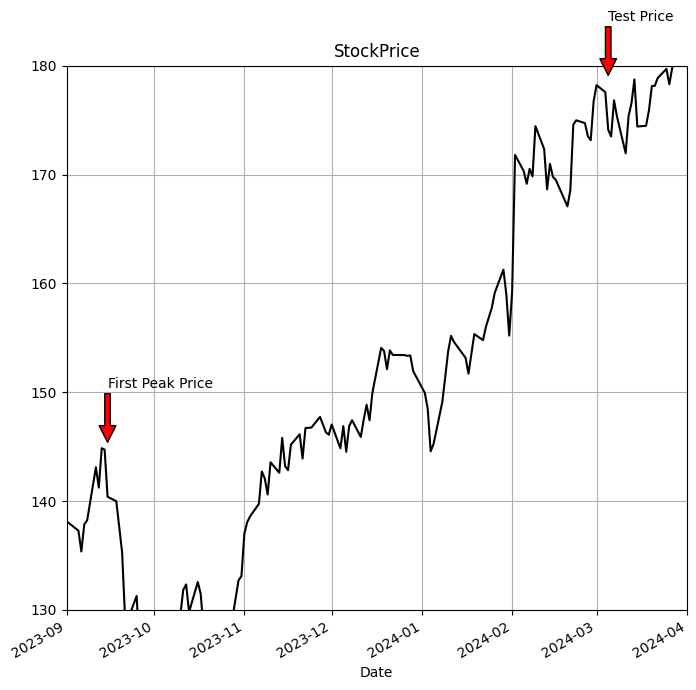

In [39]:
import pandas as pd
import os
from datetime import datetime

data = pd.read_csv("data/AMZN.csv", index_col=0, parse_dates=True)
price = data["Close"]

# 축 그리기 및 좌표축 설정
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style="black")
ax.set_ylim(130, 180)
ax.set_xlim("2023-09-01", "2024-04-01")

importance_data = [(datetime(2023, 9, 15), "First Peak Price"), 
                         (datetime(2024, 3, 5), "Test Price")]

for d, label in importance_data:
    ax.annotate(text=label, xy=(d, price.asof(d)+5),
                xytext=(d, price.asof(d)+10),
                arrowprops={"facecolor": "red"})
ax.set_title("StockPrice")

plt.grid()
plt.show()

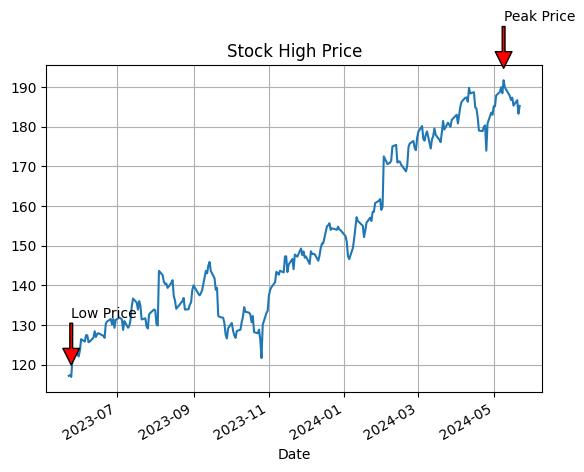

In [73]:
# 날짜별 종가(Close)가 아닌 최고가(High) 데이터를 이용해서 위와 같은 그래프

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

price_high = data["High"]
price_high.plot(ax=ax)

min_date = price_high.idxmin().to_pydatetime()
max_date = price_high.idxmax().to_pydatetime()

annotations  = [(min_date, "Low Price"), (max_date, "Peak Price")]

for d, label in annotations:
    ax.annotate(text=label, xy=(d, price_high.asof(d)+3),
            xytext=(d, price_high.asof(d)+15),
            arrowprops=dict(facecolor="red", width=2, lw=1))

ax.set_title("Stock High Price")
ax.grid()

plt.show()

### plt.plot

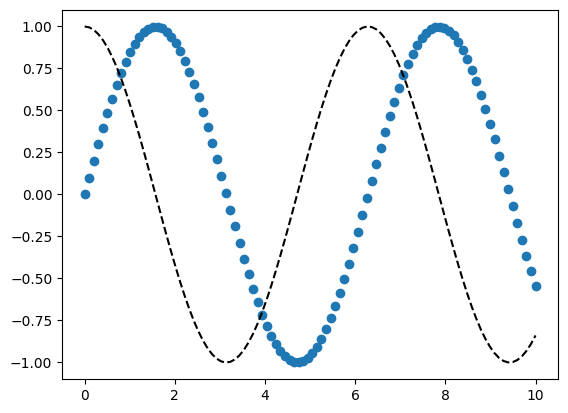

In [77]:
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), "o")
plt.plot(x, np.cos(x), "--", color="black")
plt.show()

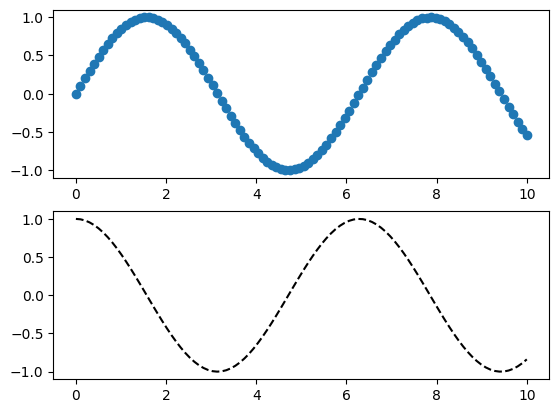

In [79]:
# subplot 추가

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), "o")

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), "--", color="black")

plt.show()

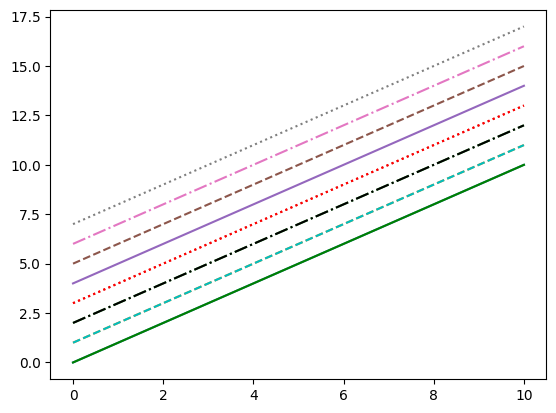

In [80]:
# linestyle, marker 옵션

x = np.linspace(0, 10, 100) 

plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

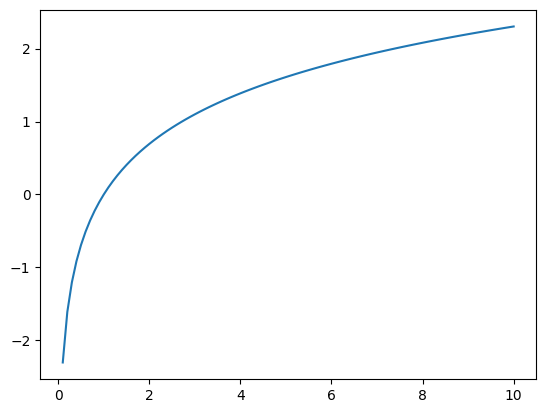

In [83]:
# y=log(x) 그래프
# dashdot line style, color magenta

x = np.linspace(0.1, 10, 100)
y = np.log(x)

plt.plot(x, y)
plt.show()

### Pandas로 그래프 그리기
- Pandas 도 plot() 메서드를 통해 여러 그래프를 그릴 수 있다.

* plot method argument
  - label: 그래프 범례
  - ax: axe 객체
  - style: maplotlib에 전달할 스타일 문자열
  - alpha: 투명도(0~1)
  - logy: Y축에 대한 로그 스케일
  - use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
  - rot: 눈금 이름을 로테이션(0~360)
  - xticks, yticks: x축, y축으로 사용할 값
  - xlim, ylim: x축, y축 limit
  - grid: 축의 그리드 표시 여부

* DataFrame plot method argument
  - subplots: DataFrame column을 독립된 서브플롯에 그리기
  - sharex: subplots=True 일 경우 같은 X축을 공유하고 축의 범위와 눈금 연결
  - sharey: subplots=Ture 일 경우 같은 Y축 공유
  - figsize: 그래프의 크기 지정(tuple)
  - title: 그래프 제목
  - sort_columns: 컬럼을 알파벳 순서대로 그리기

<Axes: >

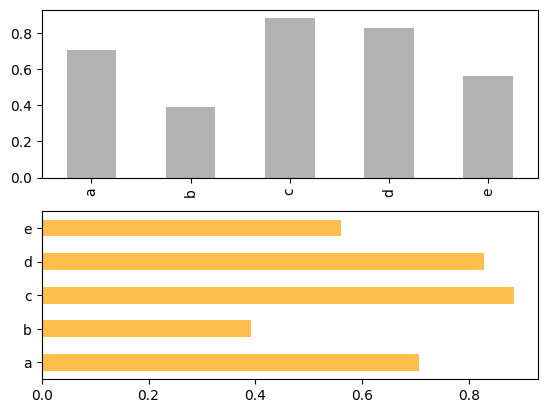

In [85]:
# bar 그래프

fig, axes = plt.subplots(2, 1)
data = pd.Series(data=np.random.rand(5), index=list("abcde"))
data.plot(kind="bar", ax=axes[0], color="black", alpha=0.3)
data.plot(kind="barh", ax=axes[1], color="orange", alpha=0.7)

In [96]:
df = pd.DataFrame(data=np.random.rand(6,4), columns=pd.Index(["A", "B", "C", "D"]))

<Axes: >

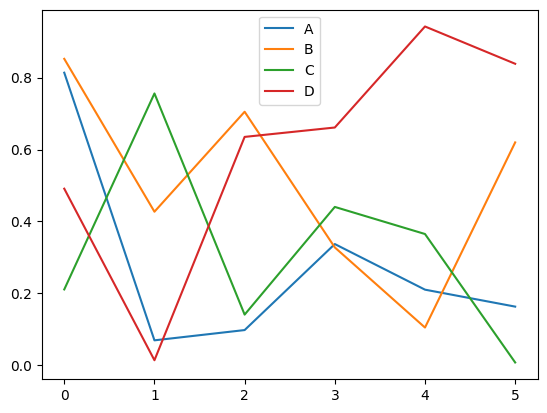

In [97]:
df.plot(kind="line")

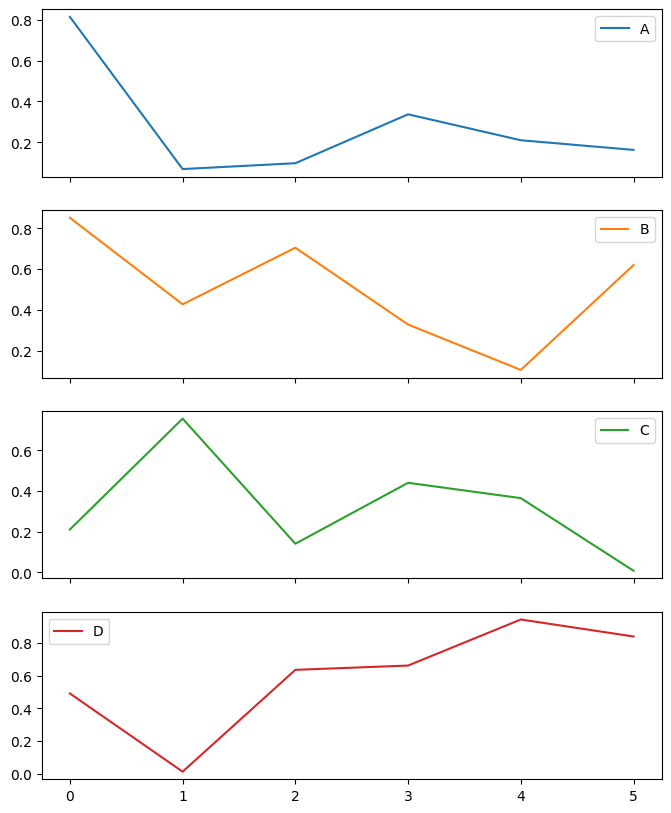

In [101]:
df.plot(kind="line", subplots=True, figsize=(8, 10))
plt.savefig(fname="fig")

### figure 정리
![figure](/node/basic/figure.png)